## PyTorch'a Giriş

> Bu not defteri, [Yeni Başlayanlar için YZ Müfredatı](http://github.com/microsoft/ai-for-beginners)'nın bir parçasıdır. Eksiksiz öğrenme materyalleri kümesi için kaynak deposunu ziyaret edin.

### Sinir Çerçeveleri

Sinir ağlarını eğitmek için şunlara ihtiyacınız olduğunu öğrendik:
* Matrisleri hızla çarpın (tensörler).
* Gradyan inişi optimizasyonunu gerçekleştirmek için gradyanları hesaplayın.

Sinir ağı çerçeveleri şunları yapmanıza izin verir:
* Mevcut herhangi bir hesaplamada, CPU veya GPU'da ve hatta TPU'da, tensörlerle çalışın.
* Gradyanları otomatik olarak hesaplayın (tüm yerleşik tensör işlevleri için açıkça programlanmışlardır).

İsteğe bağlı olarak:
* Sinir Ağı yapıcısı / daha üst seviye API (ağı bir dizi katman olarak tanımlamak)
* Basit eğitim işlevleri (Scikit Learn'de olduğu gibi `fit`)
* Gradyan inişine ek olarak bir dizi optimizasyon algoritması
* Veri işleme soyutlamaları (bu ideal olarak GPU'da da çalışır)

### En Popüler Çerçeveler

* Tensorflow 1.x - yaygın olarak kullanılabilen ilk çerçevedir (Google). Statik hesaplama çizgesini tanımlamaya, GPU'ya göndermeye ve açıkça değerlendirmeye izin verir.
* PyTorch - Facebook'tan popülaritesi artan bir çerçevedir.
* Keras - sinir ağlarını (Francois Chollet) kullanarak birleştirmek ve basitleştirmek için Tensorflow/PyTorch'un üzerüne daha üst seviye API'dir.
* Tensorflow 2.x + Keras - **dinamik hesaplama çizgesini** destekleyen ve numpy'ye (ve PyTorch) çok benzer tensör işlemleri gerçekleştirmeye olanak tanıyan tümleşik Keras işlevselliğine sahip Tensorflow'un yeni sürümüdür.

Bu Defterde PyTorch kullanmayı öğreneceğiz. PyTorch'un en son sürümünün kurulu olduğundan emin olmanız gerekir - bunu yapmak için [sitelerindeki talimatları](https://pytorch.org/get-started/locally/) izleyin. Normalde bunu yapmak bu kadar basittir
```
pip install torch torchvision
```
veya
```
conda install pytorch -c pytorch
```

In [1]:
import torch
torch.__version__

'1.11.0'

## Temel Kavramlar: Tensör

**Tensör** çok boyutlu bir dizidir. Farklı veri türlerini temsil etmek için tensör kullanmak çok uygundur:
* 400x400 - siyah beyaz resim
* 400x400x3 - renkli resim 
* 16x400x400x3 - 16 adet renkli resimden minigrup
* 25x400x400x3 - 25 fps'lik videonun bir saniyesi
* 8x25x400x400x3 - 8 adet 1 saniyelik videodan minigrup

### Basit Tensörler

Np dizilimleri listelerinden kolayca basit tensörler oluşturabilir veya rastgele üretebilirsiniz:

In [2]:
a = torch.tensor([[1,2],[3,4]])
print(a)
a = torch.randn(size=(10,3))
print(a)

tensor([[1, 2],
        [3, 4]])
tensor([[ 0.9740,  1.1339,  0.9433],
        [-0.6964, -1.0682, -0.3335],
        [-0.5078,  0.4401,  0.3818],
        [-0.0231,  0.4968, -0.8708],
        [-0.2964, -0.5230,  1.0721],
        [-1.0783, -0.6082,  0.3048],
        [-0.6351,  1.7860,  0.0811],
        [-0.0606,  0.4921,  0.0091],
        [-0.5768, -0.4674, -1.4946],
        [ 0.7530, -0.7547,  0.0091]])


Numpy'de olduğu gibi eleman bazında gerçekleştirilen tensörlerde aritmetik işlemleri kullanabilirsiniz. Gerekirse, tensörler otomatik olarak gerekli boyuta genişletilir. Tensörden numpy-dizilimini  çıkarmak için `.numpy()` kullanın:

In [3]:
print(a-a[0])
print(torch.exp(a)[0].numpy())

tensor([[ 0.0000,  0.0000,  0.0000],
        [-1.6703, -2.2020, -1.2768],
        [-1.4818, -0.6938, -0.5614],
        [-0.9971, -0.6370, -1.8141],
        [-1.2703, -1.6569,  0.1288],
        [-2.0523, -1.7420, -0.6384],
        [-1.6091,  0.6522, -0.8621],
        [-1.0346, -0.6417, -0.9341],
        [-1.5508, -1.6012, -2.4378],
        [-0.2210, -1.8885, -0.9341]])
[2.6484823 3.1076026 2.5683248]


## Yerinde ve Hizası Dışında İşlemler

`+`/`add` gibi tensör işlemleri yeni tensörler döndürür. Ancak bazen mevcut tensörü yerinde değiştirmeniz gerekir. İşlemlerin çoğunun `_` ile biten yerinde karşılıkları vardır:

In [4]:
u = torch.tensor(5)
print("Hizası dışında toplarken sonuç:",u.add(torch.tensor(3)))
u.add_(torch.tensor(3))
print("Yerinde topladıktan sonra sonuç:", u)

Hizası dışında toplarken sonuç: tensor(8)
Yerinde topladıktan sonra sonuç: tensor(8)


Bir matristeki tüm satırların toplamını saf bir şekilde şöyle hesaplayabiliriz:

In [5]:
s = torch.zeros_like(a[0])
for i in a:
  s.add_(i)

print(s)

tensor([-2.1476,  0.9275,  0.1025])


Ama aşağıdakini kullanmak çok daha iyidir:

In [6]:
torch.sum(a,axis=0)

tensor([-2.1476,  0.9275,  0.1025])

[Resmi dokümantasyonda](https://pytorch.org/tutorials/beginner/basics/tensorqs_tutorial.html) PyTorch tensörleri hakkında daha fazla bilgi edinebilirsiniz.

## Gradyanları Hesaplama

Geri yayma için gradyanları hesaplamanız gerekir. Herhangi bir PyTorch tensörünün `requires_grad` özelliğini `True` olarak ayarlayabiliriz; bu, tüm işlemlerde gradyan hesaplamaları için bu tensörün izlenmesiyle sonuçlanacaktır. Gradyanları hesaplamak için `backward()` yöntemini çağırmanız gerekir, ardından gradyan `grad` özelliği kullanılarak mevcut hale gelir:

In [7]:
a = torch.randn(size=(2, 2), requires_grad=True)
b = torch.randn(size=(2, 2))

c = torch.mean(torch.sqrt(torch.square(a) + torch.square(b)))  # `a` kullanarak biraz matematik yapın
c.backward() # tüm gradyanlari hesaplamak için backward() çağırın
# `c`'nin `a`'ya göre gradyanı nedir?
print(a.grad)

tensor([[0.2352, 0.0731],
        [0.2213, 0.2482]])


Daha kesin olmak gerekirse, PyTorch gradyanları otomatik olarak **biriktirir**. `backward` işlevi çağrılırken `retain_graph=True` değerini belirtirseniz, hesaplamalı çizge korunur ve `grad` alanına yeni gradyan eklenir. Hesaplama gradyanlarını sıfırdan yeniden başlatmak için, `zero_()` çağırarak `grad` alanını açıkça 0'a kurmamız gerekiyor:

In [8]:
c = torch.mean(torch.sqrt(torch.square(a) + torch.square(b)))
c.backward(retain_graph=True)
c.backward(retain_graph=True)
print(a.grad)
a.grad.zero_()
c.backward()
print(a.grad)

tensor([[0.7055, 0.2193],
        [0.6638, 0.7445]])
tensor([[0.2352, 0.0731],
        [0.2213, 0.2482]])


PyTorch, gradyanları hesaplamak için **hesaplama çizgesi** oluşturur ve bakımını yapar. `requires_grad` bayrağı `True` olarak ayarlanmış her tensör için PyTorch, ifadenin türevini zincir türev alma kuralına göre hesaplayan `grad_fn` adlı özel bir işlevinin bakımını yapar:

In [9]:
print(c)

tensor(0.8781, grad_fn=<MeanBackward0>)


Burada `c`, `mean` ('ortalama') işlevi kullanılarak hesaplanır, bu nedenle `grad_fn`, `MeanBackward` adlı bir işleve işaret eder.

Çoğu durumda, PyTorch'un bir skaler fonksiyonun (kayıp fonksiyonu gibi) gradyanını hesaplamasını isteriz. Bununla birlikte, bir tensörün gradyanını başka bir tensöre göre hesaplamak istiyorsak, PyTorch bize bir Jacobian matrisinin ve belirli bir vektörün çarpımını hesaplamamıza izin verir.

Varsayalım $\vec{y}=f(\vec{x})$ vektörümüz olsun, öyleki
$\vec{x}=\langle x_1,\dots,x_n\rangle$ ve
$\vec{y}=\langle y_1,\dots,y_m\rangle$, o zaman $\vec{y}$ gradyanı $\vec{x}$'e göre bir **Jacobian** ile tanımlanır:

$$
\begin{align}J=\left(\begin{array}{ccc}
   \frac{\partial y_{1}}{\partial x_{1}} & \cdots & \frac{\partial y_{1}}{\partial x_{n}}\\
   \vdots & \ddots & \vdots\\
   \frac{\partial y_{m}}{\partial x_{1}} & \cdots & \frac{\partial y_{m}}{\partial x_{n}}
\end{array}\right)\end{align}
$$

Bize Jacobian'ın tamamına erişim vermek yerine, PyTorch Jacobian'ın $v^T\cdot J$ çarpımını $v=(v_1 \dots v_m)$ vektörü ile hesaplar. Bunu yapmak için ``backward``'ı çağırmamız ve argüman olarak `v`'yi geçmemiz gerekiyor. `v`'nin boyutu, gradyanı hesapladığımız orijinal tensörün boyutuyla aynı olmalıdır.

In [10]:
c = torch.sqrt(torch.square(a) + torch.square(b))
c.backward(torch.eye(2)) # eye(2) 2x2 birim matris anlamına gelir
print(a.grad)

tensor([[1.1758, 0.0731],
        [0.2213, 1.2409]])


PyTorch'ta Jacobian hesaplama hakkında daha fazla bilgiyi [resmi dokümantasyon](https://pytorch.org/tutorials/beginner/basics/autogradqs_tutorial.html)da bulabilirsiniz.

# Örnek 0: Gradyan İnişi Kullanarak Eniyileme

İki değişkenli basit bir fonksiyonun, $f(x_1,x_2)=(x_1-3)^2+(x_2+2)^2$, minimumunu bulmak için otomatik türev almayı deneyelim. Tensör `x` bir noktanın mevcut koordinatlarını tutsun. Bir başlangıç noktası $x^{(0)}=(0,0)$ ile başlıyoruz ve gradyan inişi formülünü kullanarak bir dizideki sonraki noktayı hesaplıyoruz:
$$
x^{(n+1)} = x^{(n)} - \eta\nabla f
$$
Burada $\eta$ sözde **öğrenme oranı** (kodda `lr` ile göstereceğiz) ve $\nabla f = (\frac{\partial f}{\partial x_1},\frac{\partial f}{\partial x_2})$, $f$'in gradyanıdır.

Başlamak için, `x`'in başlangıç değerini ve `f` fonksiyonunu tanımlayalım:

In [11]:
x = torch.zeros(2,requires_grad=True)
f = lambda x : (x-torch.tensor([3,-2])).pow(2).sum()
lr = 0.1

Şimdi 15 gradyan inişi yinelemesi yapalım. Her yinelemede, (3,-2)'deki minimum noktaya yaklaştığımızdan emin olmak için `x` koordinatlarını güncelleyeceğiz ve yazdıracağız:

In [12]:
for i in range(15):
    y = f(x)
    y.backward()
    gr = x.grad
    x.data.add_(-lr*gr)
    x.grad.zero_()
    print("Adım {}: x[0]={}, x[1]={}".format(i,x[0],x[1]))

Adım 0: x[0]=0.6000000238418579, x[1]=-0.4000000059604645
Adım 1: x[0]=1.0800000429153442, x[1]=-0.7200000286102295
Adım 2: x[0]=1.4639999866485596, x[1]=-0.9760000705718994
Adım 3: x[0]=1.7711999416351318, x[1]=-1.1808000802993774
Adım 4: x[0]=2.0169599056243896, x[1]=-1.3446400165557861
Adım 5: x[0]=2.2135679721832275, x[1]=-1.4757120609283447
Adım 6: x[0]=2.370854377746582, x[1]=-1.5805696249008179
Adım 7: x[0]=2.4966835975646973, x[1]=-1.6644556522369385
Adım 8: x[0]=2.597346782684326, x[1]=-1.7315645217895508
Adım 9: x[0]=2.677877426147461, x[1]=-1.7852516174316406
Adım 10: x[0]=2.7423019409179688, x[1]=-1.8282012939453125
Adım 11: x[0]=2.793841600418091, x[1]=-1.8625609874725342
Adım 12: x[0]=2.835073232650757, x[1]=-1.8900487422943115
Adım 13: x[0]=2.868058681488037, x[1]=-1.912039041519165
Adım 14: x[0]=2.894446849822998, x[1]=-1.929631233215332


## Örnek 1: Doğrusal Bağlanım

Artık klasik **doğrusal bağlanım** problemini çözecek kadar bilgimiz var. Küçük sentetik veri kümesi oluşturalım:

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, make_regression
from sklearn.model_selection import train_test_split
import random

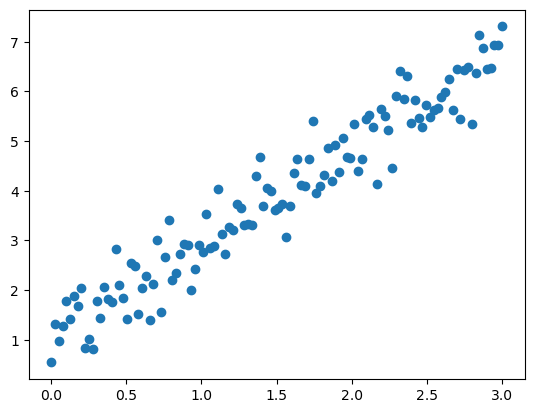

In [14]:
np.random.seed(13) # yeniden üretilebilirlik için tohumu seçin - rastgele değişimlerin etkilerini keşfetmek için değiştirin

train_x = np.linspace(0, 3, 120)
train_labels = 2 * train_x + 0.9 + np.random.randn(*train_x.shape) * 0.5

plt.scatter(train_x,train_labels)

Doğrusal bağlanım, $f_{W,b}(x) = Wx+b$ doğrusuyla tanımlanır, burada $W$ ve $b$ bulmamız gereken model parametreleridir. $\{x_i,y_u\}_{i=1}^N$ (**kayıp işlevi** olarak da adlandırılır) veri kümemizdeki hata, ortalama kare hatası olarak tanımlanabilir:
$$
\mathcal{L}(W,b) = {1\over N}\sum_{i=1}^N (f_{W,b}(x_i)-y_i)^2
$$
Modelimizi ve kayıp fonksiyonumuzu tanımlayalım:

In [15]:
input_dim = 1
output_dim = 1
learning_rate = 0.1

# This is our weight matrix
w = torch.tensor([100.0],requires_grad=True,dtype=torch.float32)
# This is our bias vector
b = torch.zeros(size=(output_dim,),requires_grad=True)

def f(x):
  return torch.matmul(x,w) + b

def compute_loss(labels, predictions):
  return torch.mean(torch.square(labels - predictions))

Modeli bir dizi minigrup üzerinde eğiteceğiz. Aşağıdaki formülleri kullanarak model parametrelerini ayarlayarak gradyan inişini kullanacağız:
$$
\begin{array}{l}
W^{(n+1)}=W^{(n)}-\eta\frac{\partial\mathcal{L}}{\partial W} \\
b^{(n+1)}=b^{(n)}-\eta\frac{\partial\mathcal{L}}{\partial b} \\
\end{array}
$$

In [16]:
def train_on_batch(x, y):
  predictions = f(x)
  loss = compute_loss(y, predictions)
  loss.backward()
  w.data.sub_(learning_rate * w.grad)
  b.data.sub_(learning_rate * b.grad)
  w.grad.zero_()
  b.grad.zero_()
  return loss

Eğitimi yapalım. Veri kümesinden (**dönemler** olarak adlandırılır) birkaç geçiş yapacağız, onu minigruplara ayıracağız ve yukarıda tanımlanan işlevi çağıracağız:

In [17]:
# Shuffle the data.
indices = np.random.permutation(len(train_x))
features = torch.tensor(train_x[indices],dtype=torch.float32)
labels = torch.tensor(train_labels[indices],dtype=torch.float32)

In [18]:
batch_size = 4
for epoch in range(10):
  for i in range(0,len(features),batch_size):
    loss = train_on_batch(features[i:i+batch_size].view(-1,1),labels[i:i+batch_size])
  print('Dönem %d: son toplu iş kaybı = %.4f' % (epoch, float(loss)))

Dönem 0: son toplu iş kaybı = 94.5247
Dönem 1: son toplu iş kaybı = 9.3428
Dönem 2: son toplu iş kaybı = 1.4166
Dönem 3: son toplu iş kaybı = 0.5224
Dönem 4: son toplu iş kaybı = 0.3807
Dönem 5: son toplu iş kaybı = 0.3495
Dönem 6: son toplu iş kaybı = 0.3413
Dönem 7: son toplu iş kaybı = 0.3390
Dönem 8: son toplu iş kaybı = 0.3384
Dönem 9: son toplu iş kaybı = 0.3382


Şimdi optimize edilmiş $W$ ve $b$ parametrelerini elde ettik. Değerlerinin, veri kümesi oluşturulurken kullanılan orijinal değerlere benzer olduğuna dikkat edin ($W=2, b=1$)

In [19]:
w,b

(tensor([1.8617], requires_grad=True), tensor([1.0711], requires_grad=True))

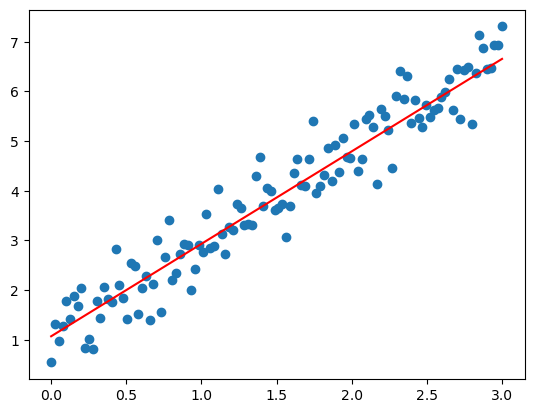

In [20]:
plt.scatter(train_x,train_labels)
x = np.array([min(train_x),max(train_x)])
with torch.no_grad():
  y = w.numpy()*x+b.numpy()
plt.plot(x,y,color='red')

## GPU'daki Hesaplamalar

Hesaplamalar için GPU'yu kullanmak için PyTorch, tensörleri GPU'ya taşımayı ve GPU için hesaplamalı çizgeyi oluşturmayı destekler. Geleneksel olarak, kodumuzun başında mevcut hesaplama cihazı `device` (`cpu` veya `cuda`'dır) tanımlarız ve ardından `.to(device)` çağrısını kullanarak tüm tensörleri bu cihaza taşırız. Ayrıca, `device=...` parametresini tensör oluşturma koduna ileterek, belirtilen cihaz üzerinde önceden tensörler oluşturabiliriz. Bu kod, hem CPU'da hem de GPU'da değişiklik yapmadan çalışır:

In [21]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

print('Hesaplamaları şurada yapıyor '+device)

### Changes here: indicate device
w = torch.tensor([100.0],requires_grad=True,dtype=torch.float32,device=device)
b = torch.zeros(size=(output_dim,),requires_grad=True,device=device)

def f(x):
  return torch.matmul(x,w) + b

def compute_loss(labels, predictions):
  return torch.mean(torch.square(labels - predictions))

def train_on_batch(x, y):
  predictions = f(x)
  loss = compute_loss(y, predictions)
  loss.backward()
  w.data.sub_(learning_rate * w.grad)
  b.data.sub_(learning_rate * b.grad)
  w.grad.zero_()
  b.grad.zero_()
  return loss

batch_size = 4
for epoch in range(10):
  for i in range(0,len(features),batch_size):
    ### Changes here: move data to required device
    loss = train_on_batch(features[i:i+batch_size].view(-1,1).to(device),labels[i:i+batch_size].to(device))
  print('Dönem %d: son toplu iş kaybı = %.4f' % (epoch, float(loss)))

Hesaplamaları şurada yapıyor cpu
Dönem 0: son toplu iş kaybı = 94.5247
Dönem 1: son toplu iş kaybı = 9.3428
Dönem 2: son toplu iş kaybı = 1.4166
Dönem 3: son toplu iş kaybı = 0.5224
Dönem 4: son toplu iş kaybı = 0.3807
Dönem 5: son toplu iş kaybı = 0.3495
Dönem 6: son toplu iş kaybı = 0.3413
Dönem 7: son toplu iş kaybı = 0.3390
Dönem 8: son toplu iş kaybı = 0.3384
Dönem 9: son toplu iş kaybı = 0.3382


## Örnek 2: Sınıflandırma

Şimdi ikili sınıflandırma problemini ele alacağız. Böyle bir soruna iyi bir örnek, boyutuna ve yaşına göre habis ve iyi huylu arasında tümör sınıflandırması olabilir.

Çekirdek model regresyona benzer, ancak farklı kayıp fonksiyonu kullanmamız gerekiyor. Örnek veriler üreterek başlayalım:

In [22]:
np.random.seed(0) # pick the seed for reproducibility - change it to explore the effects of random variations

n = 100
X, Y = make_classification(n_samples = n, n_features=2,
                           n_redundant=0, n_informative=2, flip_y=0.1,class_sep=1.5)
X = X.astype(np.float32)
Y = Y.astype(np.int32)

split = [ 70*n//100, (15+70)*n//100 ]
train_x, valid_x, test_x = np.split(X, split)
train_labels, valid_labels, test_labels = np.split(Y, split)

In [23]:
def plot_dataset(features, labels, W=None, b=None):
    # prepare the plot
    fig, ax = plt.subplots(1, 1)
    ax.set_xlabel('$x_i[0]$ -- (feature 1)')
    ax.set_ylabel('$x_i[1]$ -- (feature 2)')
    colors = ['r' if l else 'b' for l in labels]
    ax.scatter(features[:, 0], features[:, 1], marker='o', c=colors, s=100, alpha = 0.5)
    if W is not None:
        min_x = min(features[:,0])
        max_x = max(features[:,1])
        min_y = min(features[:,1])*(1-.1)
        max_y = max(features[:,1])*(1+.1)
        cx = np.array([min_x,max_x],dtype=np.float32)
        cy = (0.5-W[0]*cx-b)/W[1]
        ax.plot(cx,cy,'g')
        ax.set_ylim(min_y,max_y)
    fig.show()

/var/folders/_l/jnklp1bj4cl95rc01tf5vx4h0000gn/T/ipykernel_37297/2721537645.py:17: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


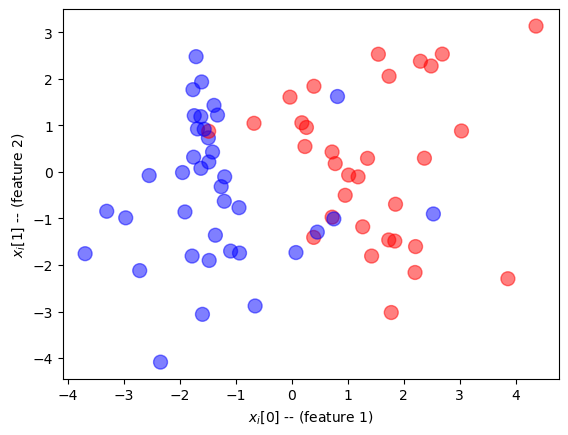

In [24]:
plot_dataset(train_x, train_labels)

## Tek Katmanlı Algılayıcı Eğitme

Tek katmanlı algılayıcı eğitmek için PyTorch gradyan hesaplama makinelerini kullanalım.

Sinir ağımızın 2 girdisi ve 1 çıktısı olacaktır. $W$ ağırlık matrisinin boyutu $2\times1$ ve ek girdi vektörünün, $b$, $1$ olacaktır.

Kodumuzu daha yapılandırılmış hale getirmek için tüm parametreleri tek bir sınıfta gruplandıralım:

In [25]:
class Network():
  def __init__(self):
     self.W = torch.randn(size=(2,1),requires_grad=True)
     self.b = torch.zeros(size=(1,),requires_grad=True)

  def forward(self,x):
    return torch.matmul(x,self.W)+self.b

  def zero_grad(self):
    self.W.data.zero_()
    self.b.data.zero_()

  def update(self,lr=0.1):
    self.W.data.sub_(lr*self.W.grad)
    self.b.data.sub_(lr*self.b)

net = Network()

> `W.zero_()` yerine `W.data.zero_()` kullandığımızı unutmayın. Bunu yapmamız gerekiyor çünkü *Autograd* mekanizması kullanılarak izlenen bir tensörü doğrudan değiştiremeyiz.

Çekirdek model önceki örnektekiyle aynı olacaktır, ancak kayıp fonksiyonu bir lojistik kaybı olacaktır. Lojistik kaybı uygulamak için, ağımızın çıktısı olarak **olasılık** değerini almamız gerekiyor, yani `sigmoid` etkinleştirme fonksiyonunu kullanarak $z$ çıktısını [0,1] aralığına getirmemiz gerekiyor: $ p=\sigma(z)$.

Gerçek $y_i\in\{0,1\}$ sınıfına karşılık gelen i. girdi değeri için $p_i$ olasılığını alırsak, kaybı $\mathcal{L_i}=-(y_i\log p_i + (1-y_i)\log(1-p_i))$ olarak hesaplarız.

PyTorch'ta, bu adımların her ikisi de (sigmoid ve ardından lojistik kayıp uygulamak) `binary_cross_entropy_with_logits` işlevine yapılan bir çağrı kullanılarak yapılabilir. Ağımızı minigruplar halinde eğittiğimiz için, bir minigrubun tüm öğelerindeki kaybın ortalamasını almamız gerekiyor  ve bu aynı zamanda `binary_cross_entropy_with_logits` işlevi tarafından otomatik olarak yapılır:

> `binary_crossentropy_with_logits` çağrısı, `sigmoid` çağrısına ve ardından `binary_crossentropy` çağrısına eşdeğerdir.

In [26]:
def train_on_batch(net, x, y):
  z = net.forward(x).flatten()
  loss = torch.nn.functional.binary_cross_entropy_with_logits(input=z,target=y)
  net.zero_grad()
  loss.backward()
  net.update()
  return loss

Verilerimizde dolaşırken veri kümelerini yönetmek için yerleşik PyTorch mekanizmasını kullanacağız. İki kavram üzerine kuruludur:
* **Veri kümesi (Dataset)** ana veri kaynağıdır, **Yinelenebilir (Iterable)** veya **Harita tarzı (Map-style)** olabilir.
* **Veri yükleyici (Dataloader)**, bir veri kümesindeki verilerin yüklenmesinden ve minigruplara bölünmesinden sorumludur.

Bizim durumumuzda, bir tensöre dayalı bir veri kümesi tanımlayacağız ve onu 16 elemanlı minigruplara ayıracağız. Her minigrup iki tensör; girdi verileri (boyut=16x2) ve etiketler (sınıf numarası - 16 uzunluğunda tamsayı tipli bir vektördür) içerir.

In [27]:
# Create a tf.data.Dataset object for easy batched iteration
dataset = torch.utils.data.TensorDataset(torch.tensor(train_x),torch.tensor(train_labels,dtype=torch.float32))
dataloader = torch.utils.data.DataLoader(dataset,batch_size=16)

list(dataloader)[0]

[tensor([[ 1.5442,  2.5290],
         [-1.6284,  0.0772],
         [-1.7141,  2.4770],
         [-1.4951,  0.7320],
         [-1.6899,  0.9243],
         [-0.9474, -0.7681],
         [ 3.8597, -2.2951],
         [-1.3944,  1.4300],
         [ 4.3627,  3.1333],
         [-1.0973, -1.7011],
         [-2.5532, -0.0777],
         [-1.2661, -0.3167],
         [ 0.3921,  1.8406],
         [ 2.2091, -1.6045],
         [ 1.8383, -1.4861],
         [ 0.7173, -0.9718]]),
 tensor([1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1.])]

Artık ağımızı 15 dönem eğitmek için tüm veri kümesinde dolaşabiliriz:

In [28]:
for epoch in range(15):
  for (x, y) in dataloader:
    loss = train_on_batch(net,x,y)
  print('Dönem %d: son toplu iş kaybı = %.4f' % (epoch, float(loss)))

Dönem 0: son toplu iş kaybı = 0.5761
Dönem 1: son toplu iş kaybı = 0.4701
Dönem 2: son toplu iş kaybı = 0.4053
Dönem 3: son toplu iş kaybı = 0.3614
Dönem 4: son toplu iş kaybı = 0.3296
Dönem 5: son toplu iş kaybı = 0.3053
Dönem 6: son toplu iş kaybı = 0.2859
Dönem 7: son toplu iş kaybı = 0.2702
Dönem 8: son toplu iş kaybı = 0.2570
Dönem 9: son toplu iş kaybı = 0.2457
Dönem 10: son toplu iş kaybı = 0.2360
Dönem 11: son toplu iş kaybı = 0.2275
Dönem 12: son toplu iş kaybı = 0.2200
Dönem 13: son toplu iş kaybı = 0.2133
Dönem 14: son toplu iş kaybı = 0.2072


Elde ettiğimiz parametreler aşağıdadır:

In [29]:
print(net.W,net.b)

tensor([[1.3857],
        [0.3547]], requires_grad=True) tensor([0.], requires_grad=True)


Eğitimimizin işe yaradığından emin olmak için iki sınıfı ayıran doğruyu çizelim. Ayırma doğrusu $W\times x + b = 0.5$ denklemiyle tanımlanır.

/var/folders/_l/jnklp1bj4cl95rc01tf5vx4h0000gn/T/ipykernel_37297/2721537645.py:17: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


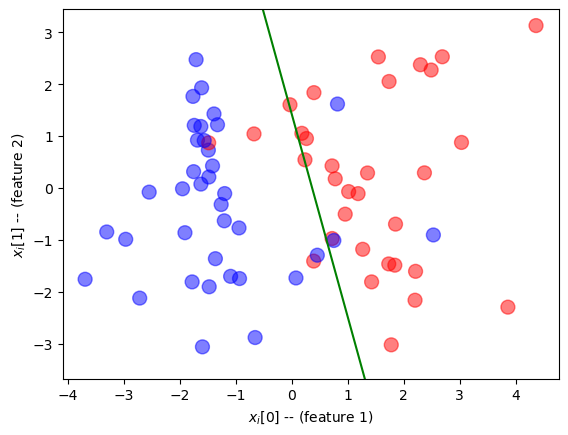

In [30]:
plot_dataset(train_x,train_labels,net.W.detach().numpy(),net.b.detach().numpy())

Şimdi doğrulama veri kümesindeki doğruluğu hesaplayalım:

In [31]:
pred = torch.sigmoid(net.forward(torch.tensor(valid_x)))
torch.mean(((pred.view(-1)>0.5)==(torch.tensor(valid_labels)>0.5)).type(torch.float32))

tensor(0.8000)

Burada neler olduğunu açıklayalım:
* `pred`, tüm geçerleme veri kümesi için tahmin edilen olasılıkların vektörüdür. Onu ağımız üzerinden `valid_x` orijinal geçerleme verilerini çalıştırarak ve olasılıkları elde etmek için `sigmoid` uygulayarak hesaplıyoruz.
* `pred.view(-1)` orijinal tensörün düzleştirilmiş bir görünümünü oluşturur. `view` (görünüm), numpy'deki `reshape` (yeniden şekillendir) işlevine benzer.
* `pred.view(-1)>0.5`, tahmin edilen sınıfı gösteren bir boole tensörü veya doğruluk değeri döndürür (False (Yanlış) = sınıf 0, True (Doğru) = sınıf 1).
* Benzer şekilde, `torch.tensor(valid_labels)>0.5)` geçerleme etiketleri için doğruluk değerlerinin boole tensörünü oluşturur.
* Bu iki tensörü eleman bazında karşılaştırırız ve `True` doğru tahmine ve `False` yanlışa karşılık gelen başka bir boole tensörü elde ederiz.
* Bu tensörü kayan virgüllü sayıya çeviririz ve `torch.mean` kullanarak ortalama değerini alırız, istenen doğruluk budur.

## Sinir Ağları ve Optimize Ediciler

PyTorch'ta, bir sinir ağını temsil etmek için özel bir `torch.nn.Module` modülü tanımlanmıştır. Kendi sinir ağınızı tanımlamanın iki yöntemi vardır:
* **Ardışık (Sequential)** olarak, yalnızca ağınızı oluşturan katmanların bir listesini belirtirsiniz.
* `torch.nn.Module`'den devralınan bir **sınıf** olarak tanımlarsınız.

İlk yöntem, ardışık katman bileşimine sahip standart ağları belirtmenize izin verirken, ikincisi daha esnektir ve gelişigüzel karmaşık mimarilerden oluşan ağları ifade etme fırsatı verir.

Modüllerin içinde standart **katmanları** kullanabilirsiniz, örneğin:
* `Linear` (Doğrusal), tek katmanlı algılayıcıya eşdeğer yoğun doğrusal katman. Ağımız için yukarıda tanımladığımızla aynı mimariye sahiptir.
* `Softmax`, `Sigmoid`, `ReLU`, etkinleştirme işlevlerine karşılık gelen katmanlar.
* Özel ağ türleri için başka katmanlar da vardır - evrişim, yinelemeli, vb. Kursun ilerleyen bölümlerinde bunların çoğuna yeniden değineceğiz.

> PyTorch'taki etkinleştirme işlevinin ve kayıp işlevlerinin çoğu iki biçimde mevcuttur: **İşlev** (`torch.nn.functional` ad alanının içinde) ve **katman olarak** (`torch.nn` ad alanının içinde). Etkinleştirme işlevleri için, ayrı katman nesnesi oluşturmadan `torch.nn.functional` öğesinden işlevsel öğeleri kullanmak genellikle daha kolaydır.

Tek katmanlı algılayıcıyı eğitmek istiyorsak, yalnızca bir yerleşik `Linear` katmanı kullanabiliriz:

In [32]:
net = torch.nn.Linear(2,1) # 2 girdi, 1 çıktı

print(list(net.parameters()))

[Parameter containing:
tensor([[-0.3171,  0.3296]], requires_grad=True), Parameter containing:
tensor([0.6366], requires_grad=True)]


Gördüğünüz gibi `parameters()` yöntemi, eğitim sırasında ayarlanması gereken tüm parametreleri döndürür. $W$ ağırlık matrisine ve $b$ ek girdiye karşılık gelirler. Gradyanları parametrelere göre hesaplamamız gerektiğinden, `requires_grad` öğesinin `True` olarak ayarlandığını fark edebilirsiniz.

PyTorch ayrıca **gradyan inişi** gibi optimizasyon yöntemlerini uygulayan yerleşik **eniyileyiciler** içerir. Bir **rasgele gradyan inişi eniyileyiciyi** şu şekilde tanımlayabiliriz:

In [33]:
optim = torch.optim.SGD(net.parameters(),lr=0.05)

Eniyileyiciyi kullanınca, eğitim döngümüz şöyle görünecektir:

In [34]:
val_x = torch.tensor(valid_x)
val_lab = torch.tensor(valid_labels)

for ep in range(10):
  for (x,y) in dataloader:
    z = net(x).flatten()
    loss = torch.nn.functional.binary_cross_entropy_with_logits(z,y)
    optim.zero_grad()
    loss.backward()
    optim.step()
  acc = ((torch.sigmoid(net(val_x).flatten())>0.5).float()==val_lab).float().mean()
  print(f"Dönem {ep}: son toplu iş kaybı = {loss}, geçerleme doğruluğu = {acc}")

Dönem 0: son toplu iş kaybı = 0.9087961316108704, geçerleme doğruluğu = 0.4000000059604645
Dönem 1: son toplu iş kaybı = 0.7703850865364075, geçerleme doğruluğu = 0.46666666865348816
Dönem 2: son toplu iş kaybı = 0.6663016676902771, geçerleme doğruluğu = 0.6000000238418579
Dönem 3: son toplu iş kaybı = 0.587394654750824, geçerleme doğruluğu = 0.7333333492279053
Dönem 4: son toplu iş kaybı = 0.5265983939170837, geçerleme doğruluğu = 0.7333333492279053
Dönem 5: son toplu iş kaybı = 0.4788611829280853, geçerleme doğruluğu = 0.800000011920929
Dönem 6: son toplu iş kaybı = 0.44066122174263, geçerleme doğruluğu = 0.800000011920929
Dönem 7: son toplu iş kaybı = 0.4095434844493866, geçerleme doğruluğu = 0.8666666746139526
Dönem 8: son toplu iş kaybı = 0.38377830386161804, geçerleme doğruluğu = 0.8666666746139526
Dönem 9: son toplu iş kaybı = 0.3621285855770111, geçerleme doğruluğu = 0.800000011920929


> Ağımızı girdi verilerine uygulamak için `net.forward(x)` yerine `net(x)` kullanabileceğimizi fark edebilirsiniz, çünkü `nn.Module` Python '__call__()' işlevini uygular.

Bunu dikkate alarak, genel `train` (eğitim) fonksiyonunu tanımlayabiliriz:

In [35]:
def train(net, dataloader, val_x, val_lab, epochs=10, lr=0.05):
  optim = torch.optim.Adam(net.parameters(),lr=lr)
  for ep in range(epochs):
    for (x,y) in dataloader:
      z = net(x).flatten()
      loss = torch.nn.functional.binary_cross_entropy_with_logits(z,y)
      optim.zero_grad()
      loss.backward()
      optim.step()
    acc = ((torch.sigmoid(net(val_x).flatten())>0.5).float()==val_lab).float().mean()
    print(f"Dönem {ep}: son toplu iş kaybı = {loss}, geçerleme doğruluğu = {acc}")

net = torch.nn.Linear(2,1)

train(net,dataloader,val_x,val_lab,lr=0.03)

Dönem 0: son toplu iş kaybı = 0.9851850867271423, geçerleme doğruluğu = 0.4000000059604645
Dönem 1: son toplu iş kaybı = 0.8353211879730225, geçerleme doğruluğu = 0.46666666865348816
Dönem 2: son toplu iş kaybı = 0.709876298904419, geçerleme doğruluğu = 0.46666666865348816
Dönem 3: son toplu iş kaybı = 0.6093153953552246, geçerleme doğruluğu = 0.6666666865348816
Dönem 4: son toplu iş kaybı = 0.530561625957489, geçerleme doğruluğu = 0.800000011920929
Dönem 5: son toplu iş kaybı = 0.46913135051727295, geçerleme doğruluğu = 0.7333333492279053
Dönem 6: son toplu iş kaybı = 0.4209415018558502, geçerleme doğruluğu = 0.800000011920929
Dönem 7: son toplu iş kaybı = 0.382853239774704, geçerleme doğruluğu = 0.800000011920929
Dönem 8: son toplu iş kaybı = 0.3525124490261078, geçerleme doğruluğu = 0.800000011920929
Dönem 9: son toplu iş kaybı = 0.3280949890613556, geçerleme doğruluğu = 0.800000011920929


## Ağı Ardışık Katmanlar Olarak Tanımlama

Şimdi çok katmanlı algılayıcıyı eğitelim. Sadece bir katman dizisi belirterek tanımlanabilir. Ortaya çıkan nesne otomatik olarak `Module`'den devralır, ör. ayrıca tüm ağın tüm parametrelerini döndürecek `parameters` yöntemine sahip olacaktır.

In [36]:
net = torch.nn.Sequential(torch.nn.Linear(2,5),torch.nn.Sigmoid(),torch.nn.Linear(5,1))
print(net)

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=5, out_features=1, bias=True)
)


Bu çok katmanlı ağı yukarıda tanımladığımız `train` fonksiyonunu kullanarak eğitebiliriz:

In [37]:
train(net,dataloader,val_x,val_lab)

Dönem 0: son toplu iş kaybı = 0.6021518111228943, geçerleme doğruluğu = 0.6000000238418579
Dönem 1: son toplu iş kaybı = 0.505835235118866, geçerleme doğruluğu = 0.6000000238418579
Dönem 2: son toplu iş kaybı = 0.4291416108608246, geçerleme doğruluğu = 0.7333333492279053
Dönem 3: son toplu iş kaybı = 0.35532107949256897, geçerleme doğruluğu = 0.800000011920929
Dönem 4: son toplu iş kaybı = 0.2888007164001465, geçerleme doğruluğu = 0.800000011920929
Dönem 5: son toplu iş kaybı = 0.23157590627670288, geçerleme doğruluğu = 0.800000011920929
Dönem 6: son toplu iş kaybı = 0.1831870824098587, geçerleme doğruluğu = 0.800000011920929
Dönem 7: son toplu iş kaybı = 0.1437370777130127, geçerleme doğruluğu = 0.800000011920929
Dönem 8: son toplu iş kaybı = 0.11355496197938919, geçerleme doğruluğu = 0.800000011920929
Dönem 9: son toplu iş kaybı = 0.09217184782028198, geçerleme doğruluğu = 0.800000011920929


## Ağı Sınıf Olarak Tanımlamak

`torch.nn.Module`'den miras alınan bir sınıfı kullanmak daha esnek bir yöntemdir, çünkü onun içinde herhangi bir hesaplama tanımlayabiliriz. `Module` birçok şeyi otomatikleştirir, örn. PyTorch katmanları olan tüm dahili değişkenleri otomatik olarak anlar ve eniyileme için parametrelerini toplar. Ağın tüm katmanlarını sınıfın üyeleri olarak tanımlamanız yeterlidir:

In [38]:
class MyNet(torch.nn.Module):
  def __init__(self,hidden_size=10,func=torch.nn.Sigmoid()):
    super().__init__()
    self.fc1 = torch.nn.Linear(2,hidden_size)
    self.func = func
    self.fc2 = torch.nn.Linear(hidden_size,1)

  def forward(self,x):
    x = self.fc1(x)
    x = self.func(x)
    x = self.fc2(x)
    return x
  
net = MyNet(func=torch.nn.ReLU())
print(net)

MyNet(
  (fc1): Linear(in_features=2, out_features=10, bias=True)
  (func): ReLU()
  (fc2): Linear(in_features=10, out_features=1, bias=True)
)


In [39]:
train(net,dataloader,val_x,val_lab,lr=0.005)

Dönem 0: son toplu iş kaybı = 0.7364251017570496, geçerleme doğruluğu = 0.46666666865348816
Dönem 1: son toplu iş kaybı = 0.7092168927192688, geçerleme doğruluğu = 0.5333333611488342
Dönem 2: son toplu iş kaybı = 0.6822843551635742, geçerleme doğruluğu = 0.5333333611488342
Dönem 3: son toplu iş kaybı = 0.6552965044975281, geçerleme doğruluğu = 0.5333333611488342
Dönem 4: son toplu iş kaybı = 0.6281629800796509, geçerleme doğruluğu = 0.6000000238418579
Dönem 5: son toplu iş kaybı = 0.5996261835098267, geçerleme doğruluğu = 0.6666666865348816
Dönem 6: son toplu iş kaybı = 0.5690117478370667, geçerleme doğruluğu = 0.7333333492279053
Dönem 7: son toplu iş kaybı = 0.5358816981315613, geçerleme doğruluğu = 0.8666666746139526
Dönem 8: son toplu iş kaybı = 0.5006707310676575, geçerleme doğruluğu = 0.8666666746139526
Dönem 9: son toplu iş kaybı = 0.46446147561073303, geçerleme doğruluğu = 0.800000011920929


**Görev 1**: Eğitim sırasında kayıp fonksiyonunun ve doğruluğun, eğitim ve geçerleme verilerindeki grafiğini çizin.

**Görev 2**: Bu kodu kullanarak MNIST sınıflandırma problemini çözmeye çalışın. İpucu: Kayıp işlevi olarak `crossentropy_with_logits` kullanın.

## Ana Fikirler

* PyTorch, düşük seviyede tensörler üzerinde çalışmanıza izin verir, en fazla esnekliğe sahip olursunuz.
* Datasets (Veri Kümeleri) ve Dataloaders (Veri Yükleyiciler) gibi verilerle çalışmak için uygun araçlar vardır.
* `Sequential` (Ardışık) sözdizimini kullanarak veya `torch.nn.Module`'den bir sınıf miras alarak sinir ağı mimarilerini tanımlayabilirsiniz.
* Bir ağı tanımlamaya ve eğitmeye daha da basit bir yaklaşım için PyTorch Lightning'e bakın.